In [4]:
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Markdown, display, Image, display_html
from sklearn.model_selection import train_test_split
from causalnex.network import BayesianNetwork
import pandas as pd
import warnings
from sklearn.preprocessing import Normalizer, MinMaxScaler
warnings.filterwarnings('ignore')

/home/etta/miniconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# df = dvc_get_data('data/data.csv')
df = pd.read_csv('../data/data.csv')
ext_df = df.copy()
ext_df = df.drop(columns=["id"])
other_df = ext_df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)
ext_df  = ext_df.iloc[:, :9]
ext_df = ext_df.drop(columns=["diagnosis"])
ext_df = df[["perimeter_worst","radius_worst","perimeter_mean","concave points_mean","concavity_worst","compactness_se","texture_worst","concave points_worst","area_worst","compactness_se"]]
ext_df
# {'radius_mean': 0.01, 'texture_mean': 0.01, 'perimeter_mean': 0.05, 'area_mean': 0.01, 'smoothness_mean': 0.01, 'compactness_mean': 0.0, 'concavity_mean': 0.0, 'concave points_mean': 0.07, 'symmetry_mean': 0.0, 'fractal_dimension_mean': 0.01, 'radius_se': 0.0, 'texture_se': 0.0, 'perimeter_se': 0.0, 'area_se': 0.01, 'smoothness_se': 0.01, 'compactness_se': 0.02, 'concavity_se': 0.0, 'concave points_se': 0.0, 'symmetry_se': 0.0, 'fractal_dimension_se': 0.0, 'radius_worst': 0.49, 'texture_worst': 0.03, 'perimeter_worst': 0.16, 'area_worst': 0.02, 'smoothness_worst': 0.0, 'compactness_worst': 0.0, 'concavity_worst': 0.02, 'concave points_worst': 0.07, 'symmetry_worst': 0.0, 'fractal_dimension_worst': 0.0}

,perimeter_worst,radius_worst,perimeter_mean,concave points_mean,concavity_worst,compactness_se,texture_worst,concave points_worst,area_worst,compactness_se
0,184.60,25.380,122.80,0.14710,0.7119,0.04904,17.33,0.2654,2019.0,0.04904
1,158.80,24.990,132.90,0.07017,0.2416,0.01308,23.41,0.1860,1956.0,0.01308
2,152.50,23.570,130.00,0.12790,0.4504,0.04006,25.53,0.2430,1709.0,0.04006
3,98.87,14.910,77.58,0.10520,0.6869,0.07458,26.50,0.2575,567.7,0.07458
4,152.20,22.540,135.10,0.10430,0.4000,0.02461,16.67,0.1625,1575.0,0.02461
...,...,...,...,...,...,...,...,...,...,...
564,166.10,25.450,142.00,0.13890,0.4107,0.02891,26.40,0.2216,2027.0,0.02891
565,155.00,23.690,131.20,0.09791,0.3215,0.02423,38.25,0.1628,1731.0,0.02423
566,126.70,18.980,108.30,0.05302,0.3403,0.03731,34.12,0.1418,1124.0,0.03731
567,184.60,25.740,140.10,0.15200,0.9387,0.06158,39.42,0.2650,1821.0,0.06158


In [6]:
# ext_df = ext_df.rename(columns={"diagnosis":"d", "radius_mean": "r" , "texture_mean": "t" , "perimeter_mean":"p" , "area_mean": "a" , "smoothness_mean":"s" , "compactness_mean": "c" , "concavity_mean": "co" , "concave points_mean": "cp"})
# ext_df
minmax_scaler = MinMaxScaler()
scaled = pd.DataFrame(minmax_scaler.fit_transform(ext_df), columns=ext_df.columns.to_list())
scaled
normal = Normalizer()
normalized = pd.DataFrame(normal.fit_transform(scaled), columns=scaled.columns.to_list())
normalized.insert(loc=0, column='diagnosis', value=df['diagnosis'].map({'M': 1, 'B': 0}).astype(int))
normalized

,diagnosis,perimeter_worst,radius_worst,perimeter_mean,concave points_mean,concavity_worst,compactness_se,texture_worst,concave points_worst,area_worst,compactness_se
0,1,0.368459,0.342252,0.301020,0.403084,0.313492,0.193736,0.078027,0.502828,0.248483,0.193736
1,1,0.391509,0.440162,0.446603,0.252940,0.139954,0.058980,0.220168,0.463569,0.315644,0.058980
2,1,0.316237,0.346057,0.370536,0.395379,0.223751,0.176612,0.223957,0.519379,0.232934,0.176612
3,1,0.159844,0.164455,0.154648,0.346291,0.363365,0.359770,0.255599,0.586054,0.062261,0.359770
4,1,0.378242,0.387789,0.470789,0.386779,0.238376,0.125287,0.092469,0.416646,0.254855,0.125287
...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.345747,0.374005,0.407251,0.414266,0.196845,0.120143,0.229986,0.456963,0.271632,0.120143
565,1,0.346968,0.373453,0.402349,0.324145,0.171048,0.109950,0.465668,0.372651,0.253062,0.109950
566,1,0.319159,0.330205,0.374464,0.221357,0.228318,0.221174,0.494779,0.409322,0.193815,0.221174
567,1,0.320608,0.303948,0.319278,0.362419,0.359682,0.213757,0.350335,0.436867,0.192868,0.213757


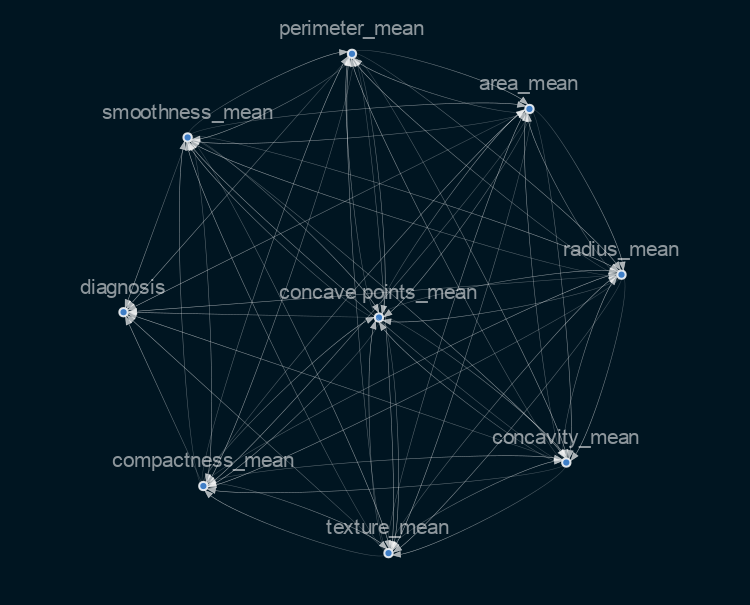

In [73]:
sm = from_pandas(normalized, tabu_parent_nodes=['diagnosis'],)
viz = plot_structure( sm, graph_attributes={"scale": "2.5",  "size": 2.5}, all_node_attributes=NODE_STYLE.WEAK,all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))


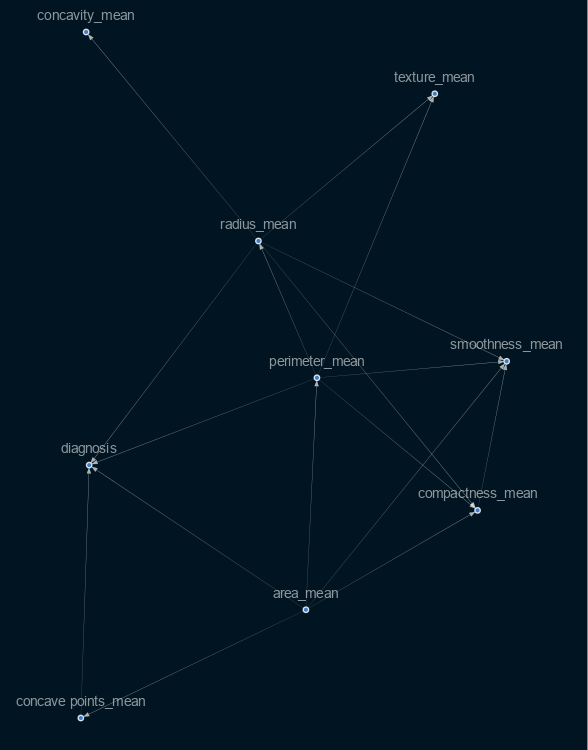

In [74]:
sm_removed = sm.remove_edges_below_threshold(0.8)
viz = plot_structure( sm_removed, graph_attributes={"scale": "2.5",  "size": 2.5}, all_node_attributes=NODE_STYLE.WEAK,all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [82]:
def select_database_percentage(df,percentage):
    size = int(df.shape[0] * percentage)
    return df[0:size:]

percentage = 0.5
selected_df = select_database_percentage(normalized,percentage)
selected_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,1,0.316438,0.013761,0.331591,0.220903,0.360600,0.481022,0.427033,0.444022
1,1,0.543776,0.230460,0.520642,0.424092,0.245092,0.153684,0.172150,0.294873
2,1,0.411242,0.266821,0.407309,0.307266,0.351633,0.294686,0.316219,0.434618
3,1,0.143304,0.246130,0.159273,0.070193,0.553407,0.553434,0.385802,0.356648
4,1,0.463230,0.115149,0.464035,0.359829,0.316485,0.255844,0.341170,0.381230
...,...,...,...,...,...,...,...,...,...
279,0,0.461385,0.262534,0.443291,0.267228,0.544907,0.250307,0.148938,0.261765
280,1,0.413639,0.409889,0.408667,0.302720,0.319838,0.277165,0.322992,0.344681
281,0,0.490579,0.317466,0.458311,0.262200,0.501406,0.160472,0.114568,0.299106
282,1,0.455409,0.221935,0.446594,0.329149,0.357221,0.296643,0.295182,0.364452


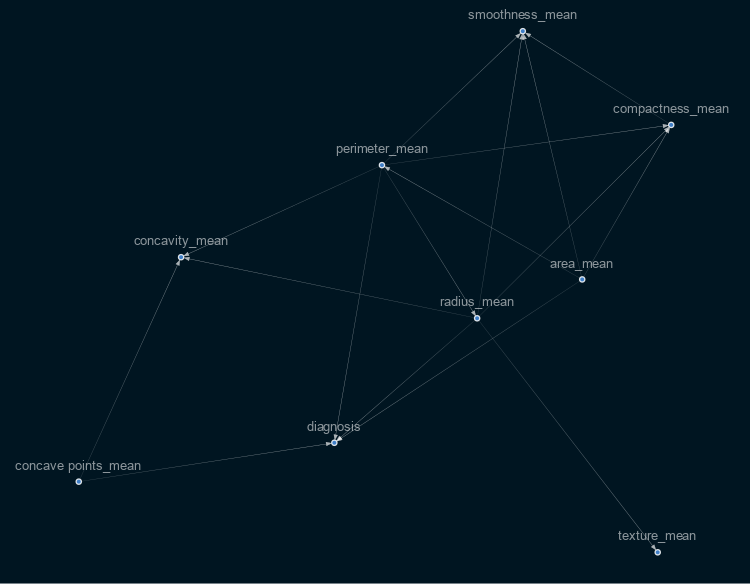

In [84]:
sm_50 = from_pandas(selected_df, tabu_parent_nodes=['diagnosis'],)
sm_50.remove_edges_below_threshold(0.8)
viz_50 = plot_structure( sm_50, graph_attributes={"scale": "2.5",  "size": 2.5}, all_node_attributes=NODE_STYLE.WEAK,all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz_50.draw(format='png'))

In [85]:
percentage = 0.8
selected_df = select_database_percentage(normalized,percentage)
selected_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,1,0.316438,0.013761,0.331591,0.220903,0.360600,0.481022,0.427033,0.444022
1,1,0.543776,0.230460,0.520642,0.424092,0.245092,0.153684,0.172150,0.294873
2,1,0.411242,0.266821,0.407309,0.307266,0.351633,0.294686,0.316219,0.434618
3,1,0.143304,0.246130,0.159273,0.070193,0.553407,0.553434,0.385802,0.356648
4,1,0.463230,0.115149,0.464035,0.359829,0.316485,0.255844,0.341170,0.381230
...,...,...,...,...,...,...,...,...,...
450,0,0.355708,0.615015,0.350989,0.188125,0.187354,0.410324,0.316136,0.182303
451,1,0.447538,0.387779,0.434854,0.333220,0.342373,0.182483,0.290805,0.337810
452,0,0.297777,0.785132,0.285697,0.158991,0.359201,0.173491,0.119102,0.121184
453,0,0.409525,0.165518,0.396596,0.243442,0.592618,0.256795,0.185174,0.370016


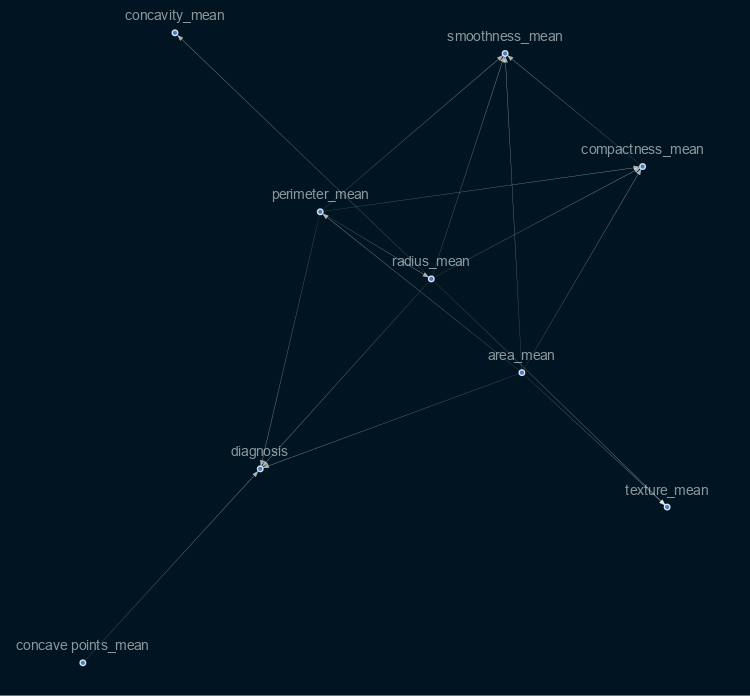

In [86]:
sm_80 = from_pandas(selected_df, tabu_parent_nodes=['diagnosis'],)
sm_80.remove_edges_below_threshold(0.8)
viz_80 = plot_structure( sm_80, graph_attributes={"scale": "2.5",  "size": 2.5}, all_node_attributes=NODE_STYLE.WEAK,all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz_80.draw(format='png'))

In [87]:
percentage = 0.9
selected_df = select_database_percentage(normalized,percentage)
selected_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,1,0.316438,0.013761,0.331591,0.220903,0.360600,0.481022,0.427033,0.444022
1,1,0.543776,0.230460,0.520642,0.424092,0.245092,0.153684,0.172150,0.294873
2,1,0.411242,0.266821,0.407309,0.307266,0.351633,0.294686,0.316219,0.434618
3,1,0.143304,0.246130,0.159273,0.070193,0.553407,0.553434,0.385802,0.356648
4,1,0.463230,0.115149,0.464035,0.359829,0.316485,0.255844,0.341170,0.381230
...,...,...,...,...,...,...,...,...,...
507,0,0.242298,0.314515,0.238164,0.118721,0.756543,0.337698,0.119480,0.266238
508,0,0.517642,0.237747,0.494003,0.336688,0.441192,0.171861,0.151959,0.266172
509,1,0.312557,0.375079,0.322990,0.194197,0.461752,0.400447,0.370455,0.329819
510,0,0.406071,0.303629,0.405151,0.216039,0.461583,0.427078,0.284117,0.236470


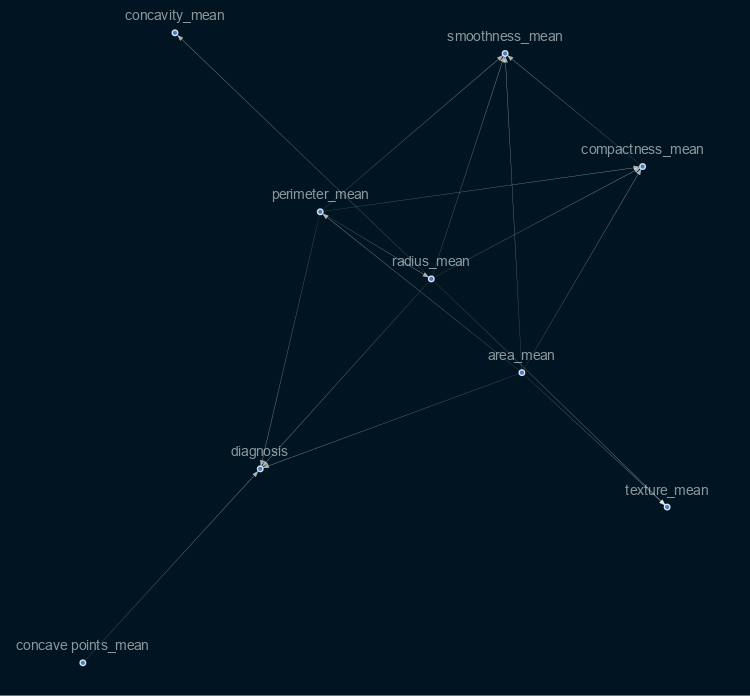

In [88]:
sm_90 = from_pandas(selected_df, tabu_parent_nodes=['diagnosis'],)
sm_90.remove_edges_below_threshold(0.8)
viz_90 = plot_structure( sm_90, graph_attributes={"scale": "2.5",  "size": 2.5}, all_node_attributes=NODE_STYLE.WEAK,all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz_90.draw(format='png'))

In [118]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    u = set(g).union(h)
    return len(i)/len(u)

In [119]:
jaccard_similarity(sm.edges, sm_80.edges)

0.8333333333333334

In [121]:
jaccard_similarity(sm_50.edges, sm_80.edges)

0.8333333333333334

In [122]:
jaccard_similarity(sm_90.edges, sm_80.edges)

1.0

In [123]:
jaccard_similarity(sm_50.edges, sm_90.edges)

0.8333333333333334

In [124]:
jaccard_similarity(sm_90.edges, sm.edges)

0.8333333333333334

In [20]:
# df_overview = DfOverview(x_selected)
def getOverview(df) -> None:

        _labels = [column for column in df]  # Only numeric columns
        _count = df.count().values
        _unique = [df[column].value_counts().shape[0] for column in df]
        nullSum = df.isna().sum()
        _missing_values =  [col for col in nullSum]

        columns = [
            'label',
            'count',
            'none_count',
            'none_percentage',
            'unique_value_count',
            'unique_percentage',
            'dtype']
        data = zip(
            _labels,
            _count,
            _missing_values,
            [str(round(((value / df.shape[0]) * 100), 2)) + '%' for value in _missing_values],
            _unique,
            [str(round(((value / df.shape[0]) * 100), 2)) + '%' for value in _unique],
            df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        new_df.set_index('label', inplace=True)
        new_df.sort_values(by=["none_count"], inplace=True)
        return new_df

overview = getOverview(df)
overview[["count", "unique_value_count", "unique_percentage"]]

,count,unique_value_count,unique_percentage
label,,,
id,569,569,100.0%
symmetry_worst,569,500,87.87%
concave points_worst,569,492,86.47%
concavity_worst,569,539,94.73%
compactness_worst,569,529,92.97%
smoothness_worst,569,411,72.23%
area_worst,569,544,95.61%
perimeter_worst,569,514,90.33%
texture_worst,569,511,89.81%


In [28]:
features = list(ext_df.columns.difference(['diagnosis']))
features  = ['area_worst',
 'compactness_se',
 'concave points_worst',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_worst',
 'radius_worst',
 'texture_worst']


['area_worst',
 'compactness_se',
 'concave points_mean',
 'concave points_worst',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_worst',
 'radius_worst',
 'texture_worst']

In [33]:
extdf = df.copy()
extracted_df = df.drop(columns=['Unnamed: 32','id','diagnosis'])
target = df['diagnosis']
df['diagnosis']
target = target.map({'M': 1, 'B': 0}).astype(int)
extracted_df = pd.concat([extracted_df, target], axis=1)
extracted_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [21]:
from causalnex.discretiser.discretiser_strategy import ( DecisionTreeSupervisedDiscretiserMethod )
tree_discretiser = DecisionTreeSupervisedDiscretiserMethod(
    mode='single',
    tree_params={'max_depth': 3, 'random_state': 2021},
)
tree_discretiser.fit(
    feat_names=features,
    dataframe=extracted_df,
    target_continuous=True,
    target='diagnosis',
)
tree_discretiser

DecisionTreeSupervisedDiscretiserMethod(tree_params={'max_depth': 3,
                                                     'random_state': 2021})

In [31]:
discretised_data = ext_df.copy()
for col in features:
    print(col)
    discretised_data[col] = tree_discretiser.transform(ext_df[[col]])

area_worst
compactness_se


ValueError: Length mismatch: Expected 1138 rows, received array of length 569

In [127]:
discretised_data = normalized.copy()

data_vals = {col: normalized[col].unique() for col in normalized.columns}

failures_map = {v: 'no-failure' if v == [0]
                else 'have-failure' for v in data_vals['failures']}
studytime_map = {v: 'short-studytime' if v in [1,2]
                 else 'long-studytime' for v in data_vals['studytime']}

{'diagnosis': array([1, 0]), 'radius_mean': array([0.31643789, 0.54377551, 0.41124233, 0.14330388, 0.46323047,
       0.23907561, 0.4773297 , 0.30754062, 0.23181818, 0.20042491,
       0.49071366, 0.43166036, 0.37798433, 0.43762117, 0.25532071,
       0.29758376, 0.42626605, 0.334483  , 0.46524994, 0.42743562,
       0.36562603, 0.2273926 , 0.32613852, 0.49850723, 0.37970469,
       0.32729798, 0.31984987, 0.47045254, 0.3250385 , 0.47508923,
       0.36903425, 0.25618015, 0.33654008, 0.42929168, 0.39973506,
       0.43154521, 0.37004007, 0.44856245, 0.43097024, 0.34423684,
       0.44504207, 0.20077505, 0.39693626, 0.32447472, 0.3504451 ,
       0.41397015, 0.13819278, 0.30341802, 0.35513383, 0.408956  ,
       0.36737041, 0.53606189, 0.43594689, 0.4056976 , 0.45909708,
       0.3524062 , 0.46384687, 0.33987647, 0.48292165, 0.17501519,
       0.23287952, 0.09642003, 0.28664009, 0.25264763, 0.27257455,
       0.31894501, 0.17844102, 0.38396729, 0.09454965, 0.42030646,
       0.48646658,

KeyError: 'failures'

In [133]:
train, test = train_test_split( selected_df, train_size=0.8, test_size=0.2, random_state=27)

In [135]:

percentage = 0.5
selected_df = select_database_percentage(normalized,percentage)
selected_df
bn = BayesianNetwork(sm_50)
bn = bn.fit_node_states(train)
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

MemoryError: Unable to allocate 39.0 GiB for an array with shape (2, 2620146592) and data type int64

In [ ]:
pred = bn.predict(test, 'diagnosis')
true = test['diagnosis']
pred

In [ ]:
print('Recall: {:.2f}'.format(recall_score(y_true=true, y_pred=pred)))
print('F1: {:.2f} '.format(f1_score(y_true=true, y_pred=pred)))
print('Accuracy: {:.2f} '.format(accuracy_score(y_true=true, y_pred=pred)))
print('Precision: {:.2f} '.format(precision_score(y_true=true, y_pred=pred)))